In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))


In [2]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [3]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [4]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [5]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [6]:
def makeCirc(n, state):
    initState = state
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [7]:
def analyse(circ):
    for i in range(0, 2):
        circ.h(i)
    circ.barrier()
    
    getOracle = random.randint(0, 3)
    circ2 = QuantumCircuit(2)
    if(getOracle == 0):
        #f(x) = 0
        print("Constant")
        pass
    elif(getOracle==1):
        #f(x) = x
        print("Balanced")
        circ2.cx(0, 1)
    elif(getOracle==2):
        #f(x) = 1
        print("Constant")
        circ2.cx(0, 1)
        circ2.x(0)
        circ2.cx(0, 1)
    else:
        #f(x) = x + 1
        print("Balanced")
        circ2.x(0)
        circ2.cx(0, 1)
    gate = circ2.to_gate(label = ' Oracle')
    circ.append(gate, [0, 1])
    circ.barrier()
    
    for i in range(0, 2):
        circ.h(i)
    for i in range(0, 1):
        circ.measure(i, i)
    return circ
    

In [8]:
circ = makeCirc(2, '01')
circ2 = analyse(circ)
getMeasure(circ2, 1)[0][1]

01
Constant


'0'

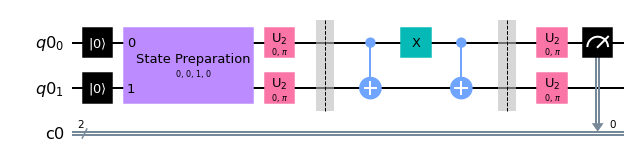

In [9]:
circ2.decompose().draw('mpl')

In [10]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle
#!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [11]:
! git clone https://github.com/qiskit-community/qiskit-textbook.git

fatal: destination path 'qiskit-textbook' already exists and is not an empty directory.


In [12]:
def getHisto(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qobj = assemble(circ, shots=shots)
    results = qasm_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

In [13]:
def simonCircuit(b):
    n = len(b)
    circ = QuantumCircuit(2*n, 2*n)
    circ.h(range(n))
    
    circ.barrier()
    circ += simon_oracle(b)
    circ.barrier()
    circ.measure(range(n, 2*n), range(n, 2*n))
    circ.barrier()
    
    circ.h(range(n))
    circ.measure(range(n), range(n))
    return circ
    
    

In [14]:
circuit = simonCircuit('10')

<ipython-input-13-7a47dcbd299f>:7: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circ += simon_oracle(b)


In [15]:
! pip install https://github.com/qiskit-community/qiskit-textbook

  ERROR: Cannot unpack file C:\Users\SUPRATIM SENGUPTA\AppData\Local\Temp\pip-unpack-du1f1tt5\qiskit-textbook (downloaded from C:\Users\SUPRATIM SENGUPTA\AppData\Local\Temp\pip-req-build-caq7dyon, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of C:\Users\SUPRATIM SENGUPTA\AppData\Local\Temp\pip-req-build-caq7dyon


In [16]:
from qiskit import visualization

In [17]:
def superDense(b):
    circ = makeCirc(2, '00')
    circ.h(0)
    circ.cx(0, 1)
    #------------
    circ.barrier()
    if (b[0] == '1'):
        circ.x(0)
    if (b[1] == '1'):
        circ.z(0)
    circ.barrier()
    #------------
    circ.cx(0, 1)
    circ.h(0)
    circ.barrier()
    circ.measure(range(0, 2), range(0, 2))
    return circ

In [18]:
circuit = superDense('10')

00


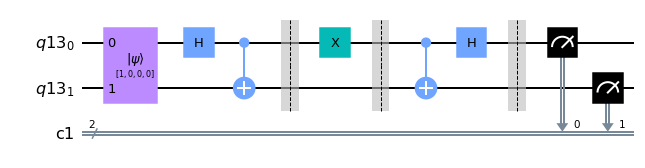

In [19]:
circuit.draw('mpl')

In [20]:
getMeasure(circuit, 1)[0]

'10'

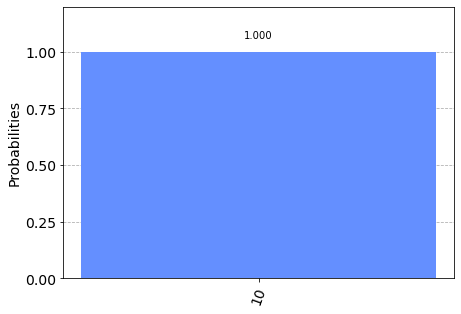

In [21]:
plot_histogram(getHisto(100, circuit))

In [22]:
def quantumPhaseEstimator(n, angle):
    circ = QuantumCircuit(n, n-1)
    circ.x(n-1)
    circ.h(range(0, n-1))
    angle = pi*angle
    
    #controlled phase gates
    for i in range(0, n-1):
        for j in range(2**i):
            circ.cp(angle, i, n-1)
   
    
    #inverse qft
    circ.barrier()
    for i in range(0, n//2):
        circ.swap(i, n-i-1)
    for i in range(n):
        for j in range(i):
            circ.cp(-pi/float(2**(i-j)), i, j)
        circ.h(i)
    circ.barrier()
    
    #measures
    circ.measure(range(0, n-1), range(0, n-1))
    return circ

In [23]:
circuit = quantumPhaseEstimator(4, 5.5/8)

In [24]:
#circuit.draw('mpl')

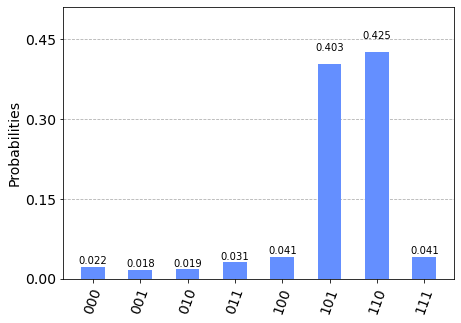

In [25]:
plot_histogram(getHisto(1024, circuit))

In [26]:
#2^3k = n
#n = 1, k = 1/8
#n = 5, k = 5/8
#n = 5.5, average of 101 and 110, 5, 6

In [27]:
def getPTrace(quantumCircuit, n):
    return quantum_info.partial_trace(execute(quantumCircuit, backend).result().get_statevector(), [n])

In [28]:
def cccZ():
    #Triple Control Z Rotation
    qc = QuantumCircuit(4)
    qc.cp(pi/4, 0, 3)
    qc.cx(0, 1)
    qc.cp(-pi/4, 1, 3)
    qc.cx(0, 1)
    qc.cp(pi/4, 1, 3)
    qc.cx(1, 2)
    qc.cp(-pi/4, 2, 3)
    qc.cx(0, 2)
    qc.cp(pi/4, 2, 3)
    qc.cx(1, 2)
    qc.cp(-pi/4, 2, 3)
    qc.cx(0, 2)
    qc.cp(pi/4, 2, 3)
    gate = qc.to_gate(label=' cccZ')
    return gate

In [29]:
def groverDiffusionOp():
    #Inversion along the mean
    circ = QuantumCircuit(4)
    circ.h(range(4))
    circ.x(range(4))
    circ.append(cccZ(), [0, 1, 2, 3])
    circ.x(range(4))
    circ.h(range(4))
    gate = circ.to_gate(label=" Diffusion")
    return gate

In [30]:
def groverOracle(n):
    #Takes in 4-bit string and returns Gate
    #Grover Oracle
    #Inversion
    circ = QuantumCircuit(4)
    if (n[3] != str(1)):
        circ.x(0)
    if (n[2] != str(1)):
        circ.x(1)
    if (n[1] != str(1)):
        circ.x(2)
    if (n[0] != str(1)):
        circ.x(3)
    circ.append(cccZ(), [0, 1, 2, 3])
    if (n[3] != str(1)):
        circ.x(0)
    if (n[2] != str(1)):
        circ.x(1)
    if (n[1] != str(1)):
        circ.x(2)
    if (n[0] != str(1)):
        circ.x(3)
    gate = circ.to_gate(label=' Grover Oracle')
    return gate

In [31]:
def groverIterate(inp):
    circ = QuantumCircuit(4)
    circ.append(groverOracle(inp), [0, 1, 2, 3])
    circ.append(groverDiffusionOp(), [0, 1, 2, 3])
    gate = circ.to_gate(label = ' Grover Iterate')
    return gate

In [32]:
circ = makeCirc(4, '0000')
circ.h(range(4))

0000


In [33]:
circ.append(groverIterate('0010'), [0, 1, 2, 3])

In [34]:
circ.measure(range(4), range(4))

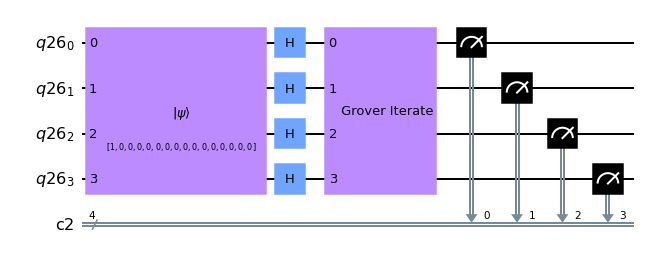

In [35]:
circ.draw('mpl')

In [36]:
#FROM QISKIT Website
#FROM QISKIT Website
#FROM QISKIT Website
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc
def getDataFrame(n_count, counts):
    rows, measured_phases = [], []
    for output in counts:
        decimal = int(output, 2)  # Convert (base 2) string to decimal
        phase = decimal/(2**n_count)  # Find corresponding eigenvalue
        measured_phases.append(phase)
    rows = []
    for phase in measured_phases:
        frac = Fraction(phase).limit_denominator(15)
        rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
    # Print as a table
    headers=["Phase", "Fraction", "Guess for r"]
    df = pd.DataFrame(rows, columns=headers)
    return df

In [37]:
def shorIt(n):
    circ = QuantumCircuit(n+4, n)
    circ.h(range(n))
    circ.x(n+3)
    for i in range(n):
        circ.append(c_amod15(a, 2**i), [i] + [j+n for j in range(4)])
    circ.append(qft_dagger(n), range(n))
    circ.measure(range(n), range(n))
    return circ

In [38]:
a = 7 #guess, 7**p
n = 8
circ = shorIt(n)

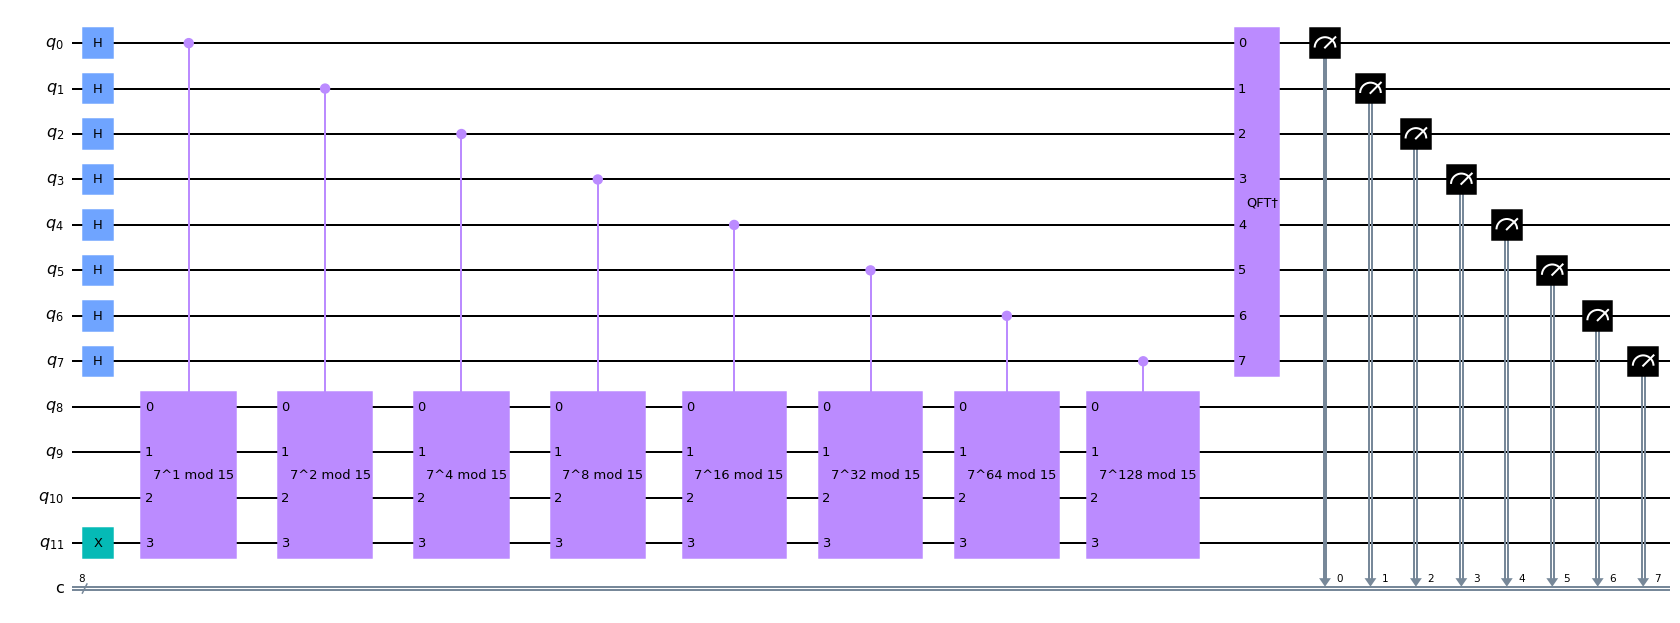

In [39]:
circ.draw('mpl',  fold=-1)

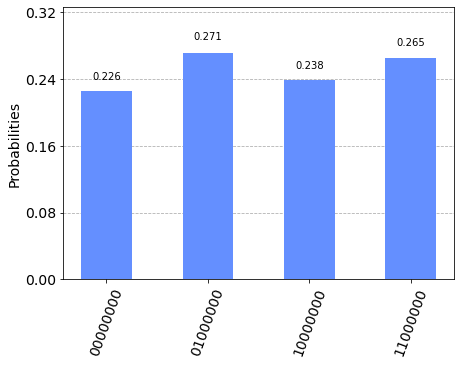

In [42]:
plot_histogram(getHistoShor(circ))

In [41]:
def getHistoShor(circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    t_qc = transpile(circ, qasm_sim)
    qobj = assemble(t_qc)
    results = qasm_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

In [45]:
dataframe = getDataFrame(n, getHistoShor(circ))

In [44]:
from fractions import Fraction
from math import gcd
import pandas as pd

In [46]:
print(dataframe)

   Phase Fraction  Guess for r
0   0.50      1/2            2
1   0.00      0/1            1
2   0.25      1/4            4
3   0.75      3/4            4


In [47]:
gcd(7**2+1, 15)

5

In [48]:
def teleportIt():
    qr = QuantumRegister(3)
    crx, crz = ClassicalRegister(1), ClassicalRegister(1)
    circ = QuantumCircuit(qr, crz, crx)
    
    ####random initial state for Alice's Personal Qubit
    w = random_state(1)
    circ.append(extensions.Initialize(w), [0])
    ##rand init state
    
    circ.barrier()
    circ.h(1)
    circ.cx(1,2)
    circ.barrier()
    
    circ.cx(0, 1)
    circ.h(0)
    circ.barrier()
    circ.measure(range(0, 2), range(0, 2))
    
    #alice sends qubit
    circ.barrier()
    circ.x(2).c_if(crx, 1)
    circ.z(2).c_if(crz, 1)
    return circ, w

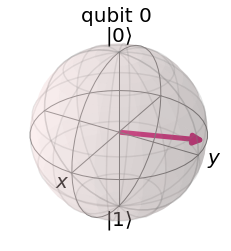

In [51]:
circ, w = teleportIt()
visualization.plot_bloch_multivector(w)

In [50]:
from qiskit_textbook.tools import random_state
from qiskit import extensions


In [ ]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [52]:
def increment(n):
    circ = QuantumCircuit(n)
    for i in range(n-1, 0, -1):
        circ.mct([j for j in range(n-i, n)], n-i-1)
    circ.x(n-1)
    #removed measure & barrier
    return circ

In [53]:
def decrement(n):
    circ = QuantumCircuit(n)
    circ.x(n-1)
    for i in range(1, n):
        circ.mct([j for j in range(n-i, n)], n-i-1)
    #removed measure and barrier
    return circ
#last section

In [54]:
def getStateVector(circ):
    return execute(circ, backend).result().get_statevector()

In [55]:
def walk(n, stateVector):
    circ = makeVCirc(n, stateVector)
    circ.h(0) #Coin Operator - Unitary Matrix of Choice
    cincrement = increment(n-1).to_gate(label=' Increment').control() #Controlled Increment, ++
    #cdecrement = decrement(n-1).to_gate(label=' Decrement').control() #Controlled Increment, ++
    circ.append(cincrement, [i for i in range(0, n)])
    circ.x(0)
    #circ.append(cdecrement, [i for i in range(0, n)])
    return circ

In [56]:
n = 4
temp_circ = makeCirc(n, '0011')
#Just Increment w/ Controlled Increment
#'011' -> 100 -> 101 -> 110 -> 111

0011


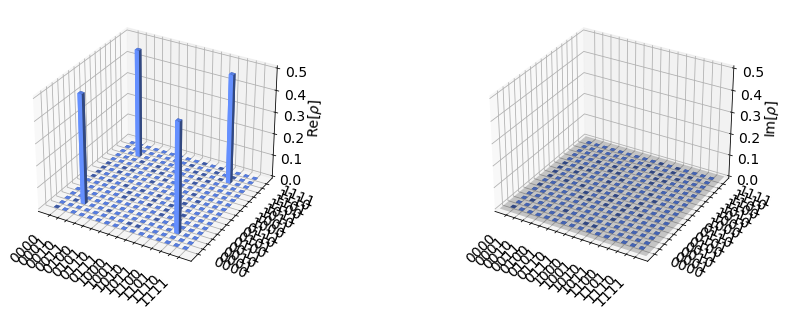

In [61]:
circ = walk(n, getStateVector(temp_circ))
display(plot_state_city(getStateVector(circ)))

In [58]:
def makeVCirc(n, state):
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = state
    circ.initialize(initializedState, qr)
    return circ

In [60]:
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.visualization import array_to_latex
from qiskit_textbook.tools import random_state

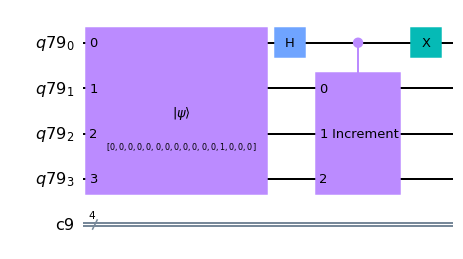

In [62]:
circ.draw('mpl', fold=-1)

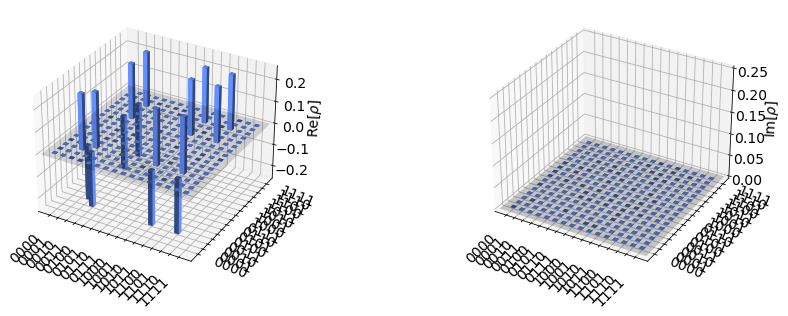

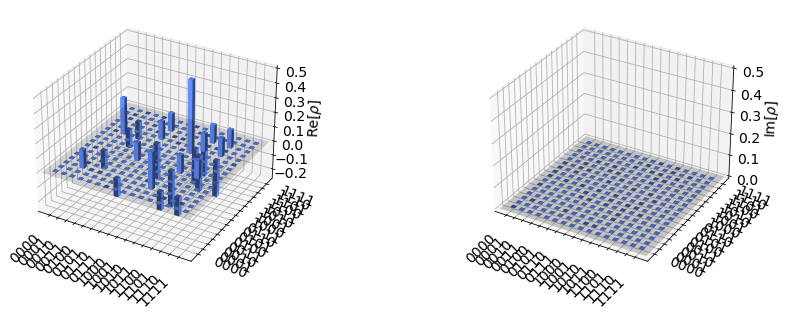

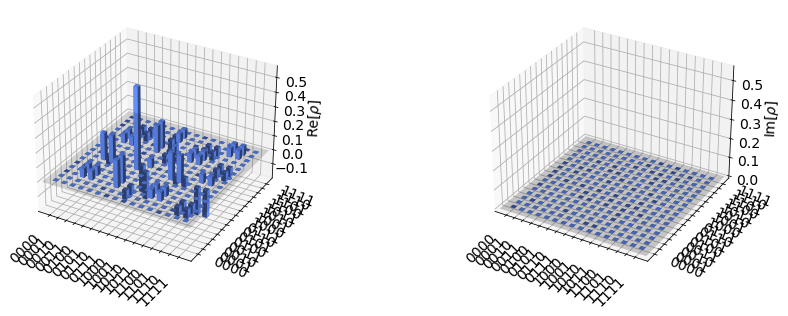

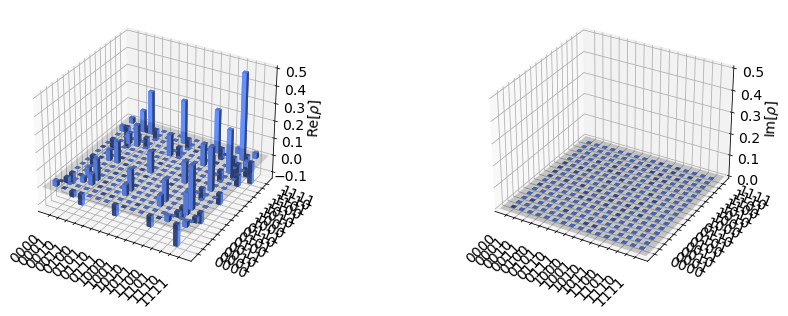

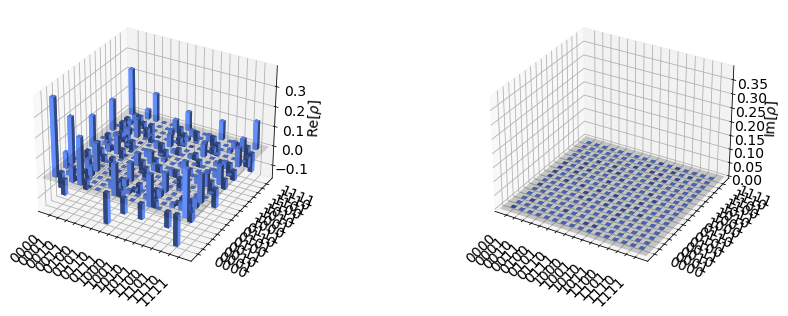

In [63]:
for i in range(5):
    circ = walk(n, getStateVector(circ))
    display(plot_state_city(getStateVector(circ)))

In [64]:
def getPTrace(quantumCircuit, n):
    return quantum_info.partial_trace(execute(quantumCircuit, backend).result().get_statevector(), n)

In [65]:
def getState():
    m = np.array(getPTrace(circ, [0, 1, 2]))
    a = Fraction(np.real(m[0][0])).limit_denominator(1000000)
    b = Fraction(np.real(m[1][1])).limit_denominator(1000000)
    
    an = a.numerator**(0.5)
    bn = b.numerator**(0.5)
    
    ad = a.denominator
    
    if (m[0][1] < 0):
        bn = -bn
    return [ad, np.transpose(np.matrix([an, bn]))]

In [66]:
def hhl(b):
    #Matrix: [[3/2, 1/2], [1/2, 3/2]]
    circ = makeCirc(4, '0000', b)
    circ.barrier()
    
    #QPE
    circ.h(3)
    circ.cx(3, 2)
    circ.cx(2, 1)
    circ.x(2)
    circ.swap(1, 2)
    
    #Controlled Rotation
    circ.barrier()
    circ.crx(pi, 2, 0)
    circ.crx(pi/3, 1, 0)
    circ.barrier()
    
    #Inverse QPE
    circ.swap(1, 2)
    circ.x(2)
    circ.cx(2, 1)
    circ.cx(3, 2)
    circ.h(3)
    
    circ.barrier()
    circ.measure(0, 0)
    return circ


In [67]:
circ = hhl([0, 1])
print(getMeasure(circ, 1))
print(getState())
array_to_latex(getState()[1], pretext="|x\\rangle = ")

TypeError: makeCirc() takes 2 positional arguments but 3 were given

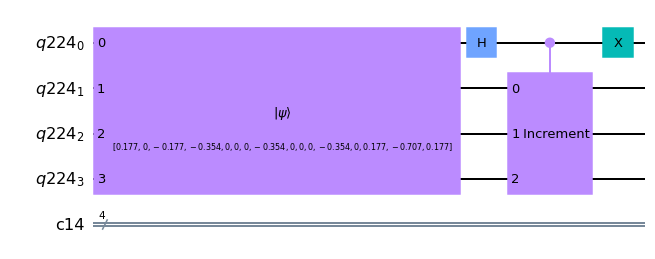

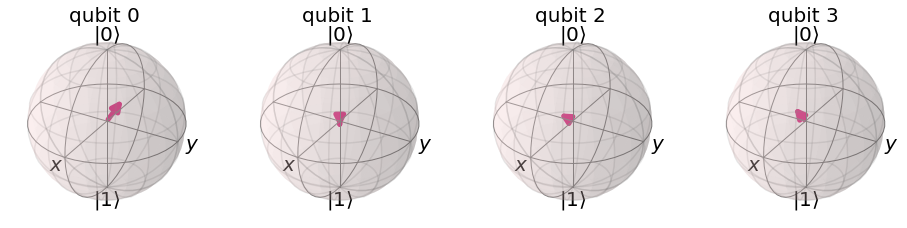

In [68]:
display(circ.draw('mpl'))
display(getBloch(circ))

In [69]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random
import time

from qiskit.visualization import plot_histogram
from qiskit.visualization import array_to_latex
from qiskit_textbook.tools import random_state

from qiskit_nature.drivers import PySCFDriver, UnitsType #Python Chemistry Library
from qiskit_nature.problems.second_quantization.electronic import ElectronicStructureProblem #2'nd Quantization

#pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

#pip install qiskit-nature
#pip install pyscf
import warnings
warnings.filterwarnings('ignore')



ImportError: cannot import name 'PySCFDriver' from 'qiskit_nature.drivers' (C:\Users\SUPRATIM SENGUPTA\AppData\Roaming\Python\Python38\site-packages\qiskit_nature\drivers\__init__.py)

In [ ]:
pip install qiskit-nature


In [ ]:
pip install pyscf

In [ ]:
# Use PySCF, a classical computational chemistry software
# package, to compute the one-body and two-body integrals in
# electronic-orbital basis, necessary to form the Fermionic operator
driver = PySCFDriver(atom='H .0 .0 .0; H .0 .0 0.735',
                     unit=UnitsType.ANGSTROM,
                     basis='sto3g')
problem = ElectronicStructureProblem(driver) #Fermionic Operator


# generate the second-quantized operators
second_q_ops = problem.second_q_ops()
main_op = second_q_ops[0]

num_particles = (problem.molecule_data_transformed.num_alpha,
                 problem.molecule_data_transformed.num_beta)

num_spin_orbitals = 2 * problem.molecule_data.num_molecular_orbitals

# setup the classical optimizer for VQE
from qiskit.algorithms.optimizers import L_BFGS_B
optimizer = L_BFGS_B()

# setup the mapper and qubit converter
from qiskit_nature.mappers.second_quantization import ParityMapper
from qiskit_nature.converters.second_quantization import QubitConverter
mapper = ParityMapper()
converter = QubitConverter(mapper=mapper, two_qubit_reduction=True)
# map to qubit operators
qubit_op = converter.convert(main_op, num_particles=num_particles)

#Convert Fermionic Operators to Pauli Matrices -> To Circuit

In [ ]:
! pip install qiskit
from qiskit.chemistry.drivers import PySCFDriver, UnitsType, Molecule


In [ ]:
# setup the initial state for the ansatz
from qiskit_nature.circuit.library import HartreeFock #Computational Chemistry Algorithm 
init_state = HartreeFock(num_spin_orbitals, num_particles, converter)

# setup the ansatz for VQE
from qiskit.circuit.library import TwoLocal
ansatz = TwoLocal(num_spin_orbitals, ['ry', 'rz'], 'cz')

# add the initial state
ansatz.compose(init_state, front=True)

# set the backend for the quantum computation
backend = Aer.get_backend('aer_simulator_statevector')

# setup and run VQE
from qiskit.algorithms import VQE
algorithm = VQE(ansatz,optimizer=optimizer,quantum_instance=backend)

In [ ]:
result = algorithm.compute_minimum_eigenvalue(qubit_op)
print(result.eigenvalue.real)

electronic_structure_result = problem.interpret(result)
print(electronic_structure_result)

In [70]:
from qiskit.visualization import plot_histogram
from qiskit.visualization import array_to_latex
from qiskit_textbook.tools import random_state

In [ ]:
pip install networkx

In [71]:
import networkx as nx

In [72]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import matplotlib.pyplot as plt
import random
import time

In [73]:
def encodeEdges(circ, edges, r):
    for i in edges:
        circ.cx(i[0], i[1])
        circ.u1(r, i[1])
        circ.cx(i[0], i[1])
        circ.barrier()
    return circ

In [74]:
def encodeDots(circ, dots, r):
    for i in range(dots):
        circ.u3(r, -np.pi/2, np.pi/2, i)
    return circ

In [75]:
#dots = 5
#edges = [(0, 1), (0, 2), (0, 3), (0, 4), (2, 3), (3, 4)]

dots = 5
edges = []
for i in range(dots):
    for j in range(i):
        if (random.randint(0, 100) < 20):
            edges.append((i, j))

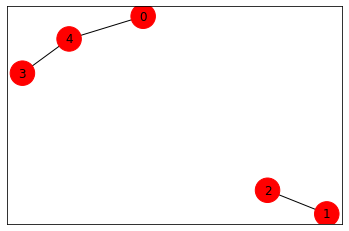

In [76]:
G = nx.Graph()
G.add_node(dots - 1)
G.add_edges_from(edges)

#Generate Visualization of Graph
colors = ['r' for node in G.nodes()]
default_axes = plt.axes(frameon=True)
pos = nx.spring_layout(G)

nx.draw_networkx(G, node_color=colors, node_size=600, ax=default_axes, alpha=1, pos=pos)



In [77]:
def generateQAOA(circ, dots, edges, r):
    circ = encodeEdges(circ, edges, r)
    circ = encodeDots(circ, dots, np.pi-r/2)
    return circ

In [78]:
steps = 2
circ = makeCirc(dots, '0'*dots)
circ.h(range(dots))
for i in range(1, steps+1):
    circ = generateQAOA(circ, dots, edges, 0.4*steps)
circ.measure(range(dots), range(dots))

00000


<ipython-input-73-2e94ea2d0cfe>:4: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  circ.u1(r, i[1])
<ipython-input-74-f97d3fbd1457>:3: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  circ.u3(r, -np.pi/2, np.pi/2, i)


In [79]:
def makeCirc(n, state):
    initState = state
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [80]:
def generateQAOA(circ, dots, edges, r):
    circ = encodeEdges(circ, edges, r)
    circ = encodeDots(circ, dots, np.pi-r/2)
    return circ

In [81]:
steps = 2
circ = makeCirc(dots, '0'*dots)
circ.h(range(dots))
for i in range(1, steps+1):
    circ = generateQAOA(circ, dots, edges, 0.4*steps)
circ.measure(range(dots), range(dots))

00000


<ipython-input-73-2e94ea2d0cfe>:4: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  circ.u1(r, i[1])
<ipython-input-74-f97d3fbd1457>:3: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  circ.u3(r, -np.pi/2, np.pi/2, i)


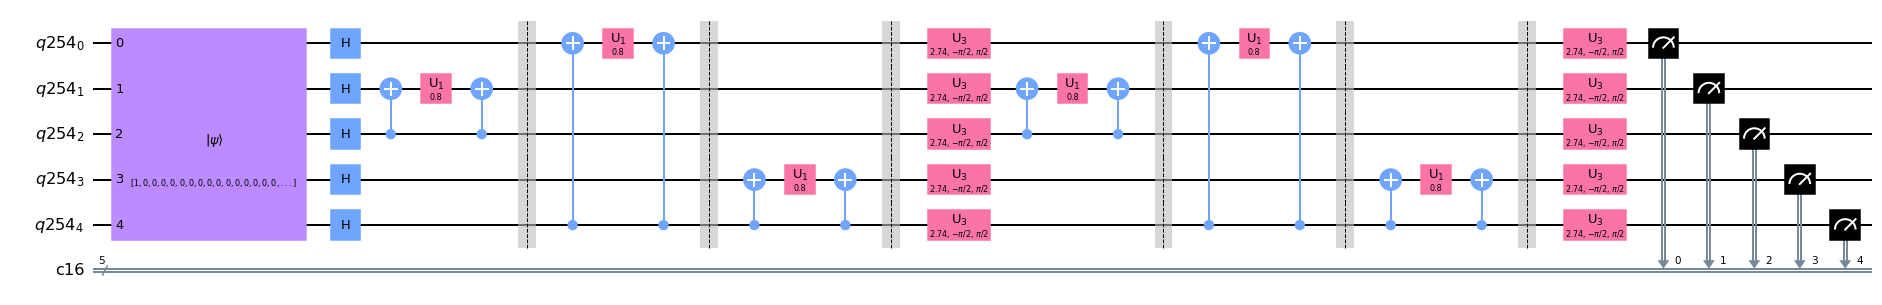

In [82]:
circ.draw('mpl', fold=-1)

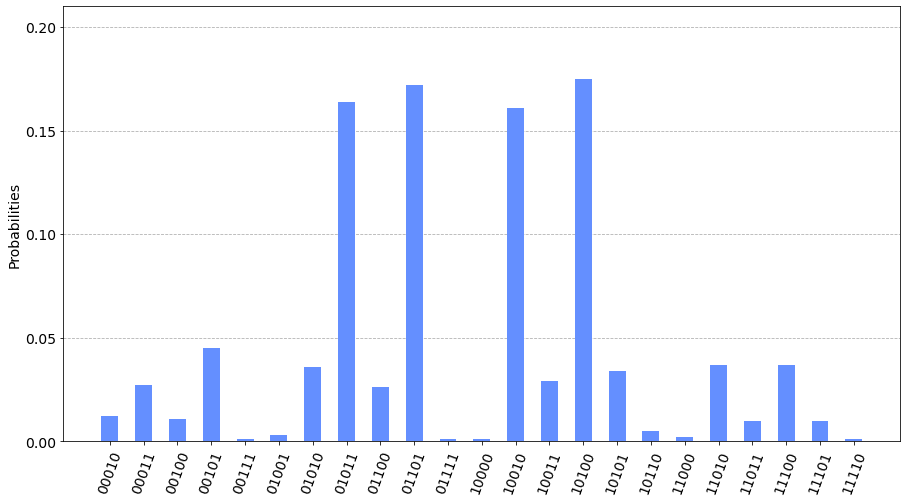

In [83]:
plot_histogram(getHisto(1000, circ), figsize=(15, 8), bar_labels=False)

In [84]:
def getHisto(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qobj = assemble(circ, shots=shots)
    results = qasm_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

In [85]:
import numpy as np
from scipy import linalg
from scipy.linalg import lstsq
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [86]:
def get_least_squares_fit(data, basis_matrix, weights=None):
    c_mat = basis_matrix
    d_mat = np.array(data)
    if weights is not None:
        w = np.array(weights)
        c_mat = w[:, None] * c_mat
        d_mat = w * d_mat
    rho_fit_mat, _, _, _ = lstsq(c_mat.T, d_mat)
    print(rho_fit_mat)
    return rho_fit_mat

In [87]:
data = [5,5,5,5,5,10, 12, 6, 2, 8, 9]
u_matrix = np.arange(0, len(data))
basis_matrix = np.array([u_matrix, np.ones(len(data))])
rho_fit_val = get_least_squares_fit(data,basis_matrix)

[0.29090909 5.09090909]


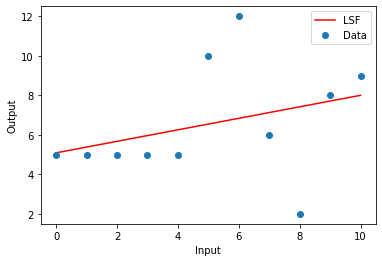

In [88]:
distances = np.arange(0, len(data), 1)
slope, intercept, r_value, p_value, std_err = stats.linregress(distances,data)
line = slope*distances+intercept
plt.plot(distances, line, 'r', label='LSF'.format(slope,intercept))
plt.plot(distances, data, label="Data",linestyle="",marker="o")

plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()